# Asymptotic solutions in long-times

Projectile motion in a non-homogenous potential field with drag is described by the equation

$$y_{\tau \tau} + \beta \epsilon y_{\tau} + \frac{1}{(1 + \epsilon y)^2} = 0,$$

with $y(0) = \epsilon$ and $y_{\tau}(0)=1$, and where $\epsilon \ll 1$ is expected.

In [1]:
import sympy as sym
from sympy import init_printing
init_printing(order='rev-lex') 

In [2]:
y, eps, a, b, tau, t, beta = sym.symbols('y, epsilon, a, b, tau, t, beta')
y0 = sym.Function('y0')(t)
y1 = sym.Function('y1')(t)
y2 = sym.Function('y2')(t)
y3 = sym.Function('y3')(t)
y4 = sym.Function('y4')(t)

In [3]:
y = sym.Eq(y0 + eps*y1 + eps**2*y2 + eps**3*y3 + eps**4*y4) # naive expansion

class f(sym.Function):
    
    @classmethod
    def eval(cls, y):
        return y.lhs.diff(t,t) + beta*eps*y.lhs.diff(t)**2 + 1/(1 + eps*y.lhs)**2
        #return y.lhs.diff(tau, tau) + eps/y.lhs**2
y

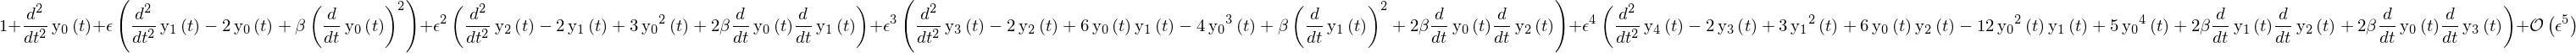

In [4]:
the_series = sym.series(f(y), eps, x0=0, n=5)
by_order = sym.collect(the_series, eps, evaluate=False)
the_series

### $\mathcal{O} \left( 1 \right) \mbox{Solution}$

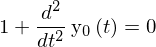

In [5]:
sym.Eq(by_order[1].removeO())

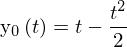

In [6]:
eqn = sym.Eq(by_order[1].removeO())    #1 + y0(tau).diff(tau, tau))
soln0 = sym.dsolve(eqn, y0)
constants = sym.solve([soln0.rhs.subs(t,0) - 0, \
                      soln0.rhs.diff(t).subs(t,0) - 1])
C1, C2 = sym.symbols('C1 C2')
soln0 = soln0.subs(constants)
soln0

### $\mathcal{O} \left( \epsilon \right) \mbox{Solution}$

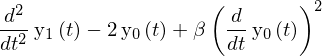

In [7]:
by_order[eps]

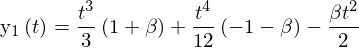

In [8]:
try:
    eqn = sym.Eq(by_order[eps].replace(y0, soln0.rhs))
except NameError:
    eqn = sym.Eq(by_order[eps])
    
soln1 = sym.dsolve(eqn, y1)
constants = sym.solve([soln1.rhs.subs(t,0) - 0, \
                      soln1.rhs.diff(t,1).subs(t,0) - 0])
C1, C2 = sym.symbols('C1 C2')
soln1 = soln1.subs(constants)
soln1


### $\mathcal{O} \left( \epsilon^2 \right) \mbox{Solution}$

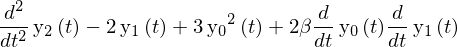

In [9]:
by_order[eps**2]

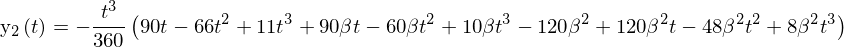

In [10]:
try:
    eqn = sym.Eq(by_order[eps**2].replace(y1, soln1.rhs).replace(y0, soln0.rhs))
except NameError:
    eqn = sym.Eq(by_order[eps**2].replace(y1, soln1.rhs))
    
soln2 = sym.dsolve(eqn, y2)
constants = sym.solve([soln2.rhs.subs(t,0) - 0, \
                      soln2.rhs.diff(t,1).subs(t,0) - 0])
C1, C2 = sym.symbols('C1 C2')
soln2 = soln2.subs(constants)
sym.factor(soln2)

### $\mathcal{O} \left( \epsilon^3 \right) \mbox{Solution}$

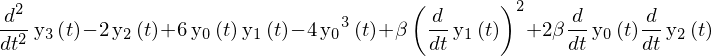

In [11]:
by_order[eps**3]

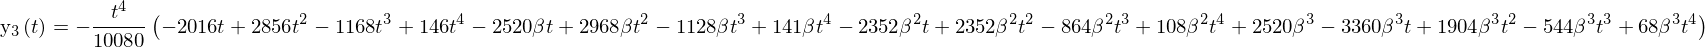

In [12]:
try:
    eqn = sym.Eq(by_order[eps**3].replace(y2, soln2.rhs).replace(y1, soln1.rhs).replace(y0, soln0.rhs))
except NameError:
    eqn = sym.Eq(by_order[eps**3].replace(y2, soln2.rhs))
    
soln3 = sym.dsolve(eqn, y3)
constants = sym.solve([soln3.rhs.subs(t,0) - 0, \
                      soln3.rhs.diff(t,1).subs(t,0) - 0])
C1, C2 = sym.symbols('C1 C2')
soln3 = soln3.subs(constants)
sym.factor(soln3)

### $\mathcal{O} \left( \epsilon^4 \right) \mbox{Solution}$

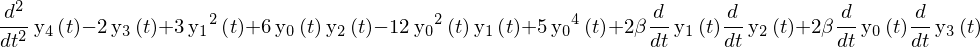

In [13]:
by_order[eps**4]

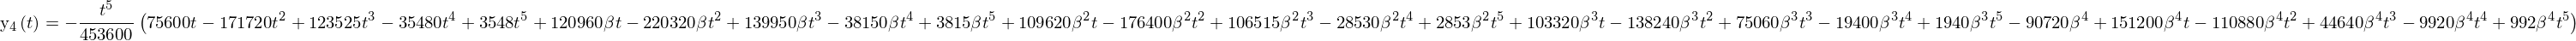

In [14]:
try:
    eqn = sym.Eq(by_order[eps**4].replace(y3, soln3.rhs).replace(
        y2, soln2.rhs).replace(y1, soln1.rhs).replace(y0, soln0.rhs))
except NameError:
    eqn = sym.Eq(by_order[eps**4].replace(y3, soln3.rhs))
    
soln4 = sym.dsolve(eqn, y4)
constants = sym.solve([soln4.rhs.subs(t,0) - 0, \
                      soln4.rhs.diff(t,1).subs(t,0) - 0])
C1, C2 = sym.symbols('C1 C2')
soln4 = soln4.subs(constants)
sym.factor(soln4)

### $\mbox{Composite Solution}$

In [15]:
y_comp = sym.symbols('y_{comp}', cls=sym.Function)
try:
    y_comp = sym.Eq(y_comp, soln0.rhs + eps*soln1.rhs + eps**2*soln2.rhs + eps**3*soln3.rhs + eps**4*soln4.rhs) # + eps**2*soln2.rhs)
except NameError:
    y_comp = sym.Eq(y_comp, eps*soln1.rhs + eps**2*soln2.rhs + eps**3*soln3.rhs + eps**4*soln4.rhs) # + eps**2*soln2.rhs)
    
print(sym.latex(y_comp))

\operatorname{y_{comp}} = t - \frac{t^{2}}{2} + \epsilon \left(\frac{t^{3}}{3} \left(1 + \beta\right) + \frac{t^{4}}{12} \left(-1 - \beta\right) - \frac{\beta t^{2}}{2}\right) + \epsilon^{2} \left(\frac{t^{4}}{12} \left(-3 - 3 \beta - 4 \beta^{2}\right) + \frac{t^{5}}{60} \left(11 + 10 \beta + 8 \beta^{2}\right) + \frac{t^{6}}{360} \left(-11 - 10 \beta - 8 \beta^{2}\right) + \frac{\beta^{2} t^{3}}{3}\right) + \epsilon^{3} \left(\frac{t^{5}}{60} \left(12 + 15 \beta + 14 \beta^{2} + 20 \beta^{3}\right) + \frac{t^{6}}{180} \left(-51 - 53 \beta - 42 \beta^{2} - 34 \beta^{3}\right) + \frac{t^{7}}{1260} \left(146 + 141 \beta + 108 \beta^{2} + 68 \beta^{3}\right) + \frac{t^{8}}{10080} \left(-146 - 141 \beta - 108 \beta^{2} - 68 \beta^{3}\right) - \frac{\beta^{3} t^{4}}{4}\right) + \epsilon^{4} \left(\frac{t^{6}}{360} \left(-60 - 96 \beta - 87 \beta^{2} - 82 \beta^{3} - 120 \beta^{4}\right) + \frac{t^{7}}{1260} \left(477 + 612 \beta + 490 \beta^{2} + 384 \beta^{3} + 308 \beta^{4}\right) + \fra

### $\mbox{The Trajectory}$

In [16]:
def savefig(filename, pics):
    if pics == True:
        plt.savefig('../doc/figures/{}.pgf'.format(filename), bbox_inches='tight')
    else:
        pass
pics = True

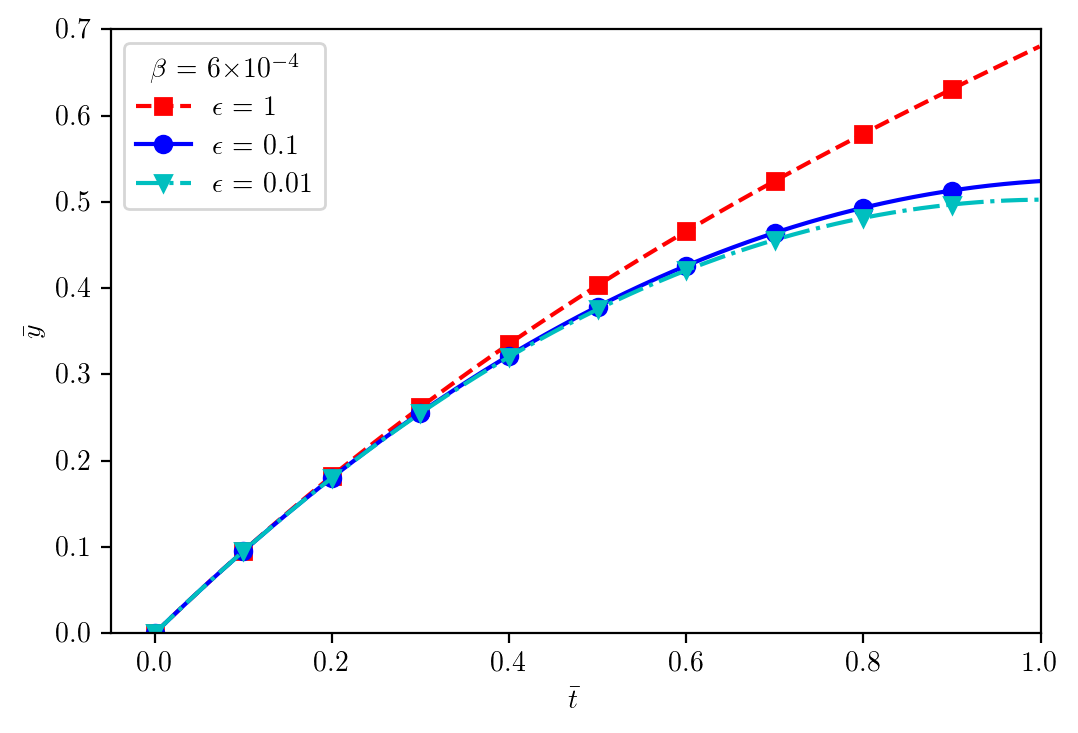

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

%config InlineBackend.figure_format = 'retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

eps_val = [.01, .1, 1.][::-1]
linestyle = ['rs--', 'bo-', 'cv-.', 'k+:', 'm']
tt = sp.arange(0,1,0.001)
bet = 6.5E-4
plt.figure(figsize=(6, 4), dpi=100)
for keys, vals in enumerate(eps_val):
    y_compP = sym.lambdify(t, y_comp.rhs.subs(eps, vals).subs(beta, bet), 'numpy')
    plt.plot(tt, y_compP(tt), linestyle[keys],label='$\epsilon$ = {}'.format(vals).rstrip('0').rstrip('.')
             , markevery=100)

plt.ylim(ymin=0., ymax=0.7)
plt.xlim(xmax=1)
plt.ylabel(r'$\bar{y}$')
plt.xlabel(r'$\bar{t}$')
plt.legend(title = r'$\beta$ = {:1.0E}'.format(bet)[:-4] + r'$\times 10^{-4}$')
savefig('long_times',pics)
plt.show()

## Time aloft

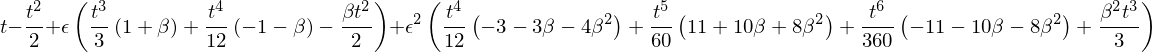

In [18]:
y2 = sym.symbols('y2', cls=sym.Function)
y2 = sym.Function('y2')(t)
try:
    y2 = sym.Eq(y2, soln0.rhs + eps*soln1.rhs + eps**2*soln2.rhs) # + eps**2*soln2.rhs)
except NameError:
    y2 = sym.Eq(y2, eps*soln1.rhs + eps**2*soln2.rhs)
y2.rhs
#y2.diff(t)

In [19]:
tau0, tau1, tau2 = sym.symbols('tau0 tau1 tau2')
tau = sym.Eq(tau0 + eps*tau1 + eps**2*tau2)
y3 = y2.rhs.subs(t, tau.lhs).series(eps)
col = sym.collect(y3, eps, evaluate=False)

### $\mathcal{O} \left( 1 \right) \mbox{Solution}$

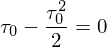

In [20]:
#tau0 = 2
sym.Eq(col[1].removeO())

Two roots, lets look at $\tau_0 = 2$.

### $\mathcal{O} \left( \epsilon \right) \mbox{Solution}$

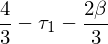

In [21]:
order_eps = col[eps].subs(tau0, 2)
order_eps 

In [22]:
soln_eps = sym.solve(order_eps, tau1)

### $\mathcal{O} \left( \epsilon^2 \right) \mbox{Solution}$

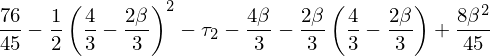

In [23]:
order_eps2 = col[eps**2].subs(tau0, 2).subs(tau1, soln_eps[0])
order_eps2

In [24]:
soln_eps2 = sym.solve(order_eps2, tau2)

### Composite solution

2 + 1.33293333333333 \epsilon + 0.799200144 \epsilon^{2} = 0


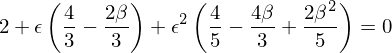

In [25]:
tau0, tau1, tau2 = sym.symbols('tau0 tau1 tau2')
tau = sym.Eq(tau0 + eps*tau1 + eps**2*tau2)
tau = tau.subs(tau0, 2).subs(tau1, soln_eps[0]).subs(tau2, soln_eps2[0])
print(sym.latex(tau.subs(beta, 6E-4)))
tau

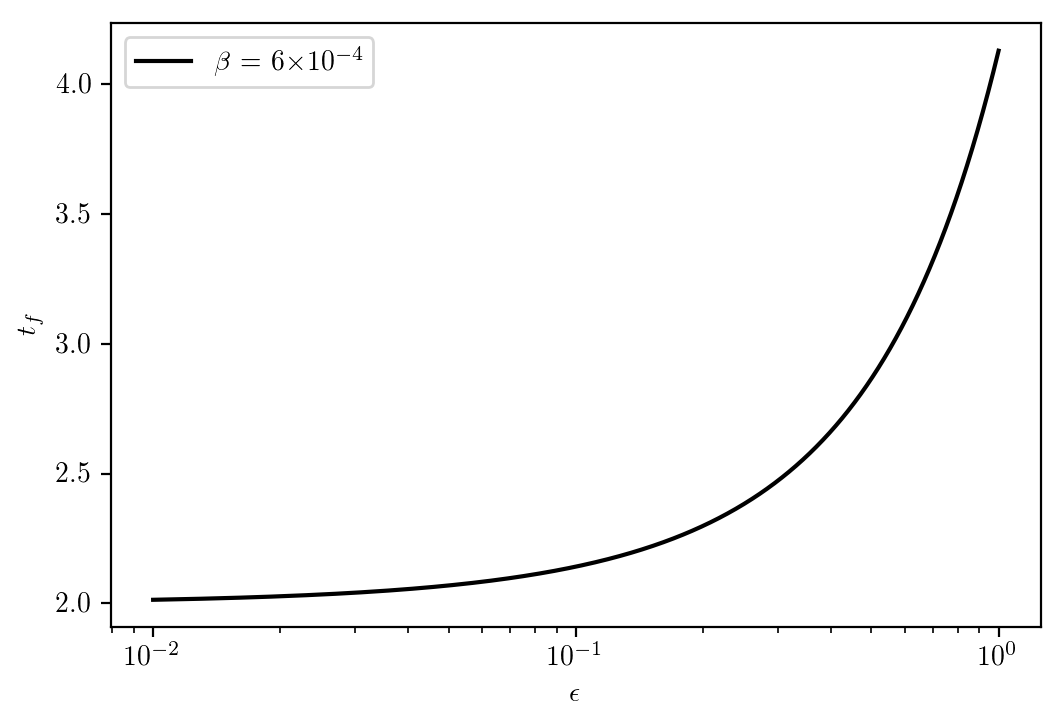

In [30]:
ttt = np.arange(0.01, 1.,0.001)
betas = [bet]
linestyle = ['k','rs--', 'bo-', 'cv-.', 'k+:', 'm']
plt.figure(figsize=(6, 4), dpi=100)
for keys, vals in enumerate(betas):
    taun = tau.subs(beta, vals)
    tau_soln = sym.lambdify(eps, taun.lhs, 'numpy')
    plt.semilogx(ttt, tau_soln(ttt), linestyle[keys], 
                 label=r'$\beta$ = {:1.0E}'.format(vals)[:-4] + r'$\times 10^{-4}$', markevery=100)
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$t_f$')
plt.legend()
savefig('drag', pics)
plt.show();

## Drag vs. inertia

In [27]:
t, V = sym.symbols('t V', real=True, positive=True)
u = sym.symbols('u', cls=sym.Function)
eq = sym.diff(u(t), t) + u(t)**2
sol = sym.dsolve(eq, u(t))
print(sol.rhs)
u = sol.rhs

1/(C1 + t)


In [28]:
C1, C2 = sym.symbols('C1 C2')
eq = sym.Eq(u.subs(t, 0), 1)
sol = sym.solve(eq, C1)[0]
print(sol)
print(u.subs(C1, sol))

1
1/(t + 1)


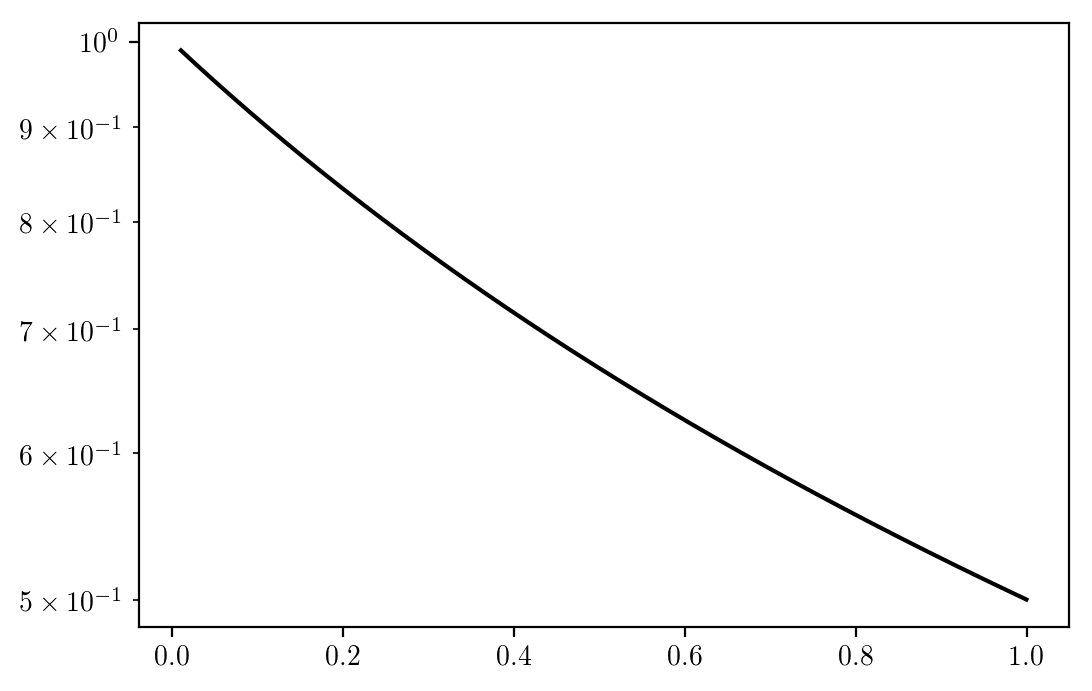

In [29]:
tt = np.arange(0.01,1.,0.001)
plt.figure(figsize=(6, 4), dpi=100)
u_soln = sym.lambdify(t, u.subs(C1, sol).subs(V,1.), 'numpy')
plt.semilogy(tt, u_soln(tt), 'k')
plt.show();